# Regresión Lineal
## Ejemplos

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

### 1. Ecuación de la recta de regresión
#### Dispersión, Ecuación de la recta y Residuos

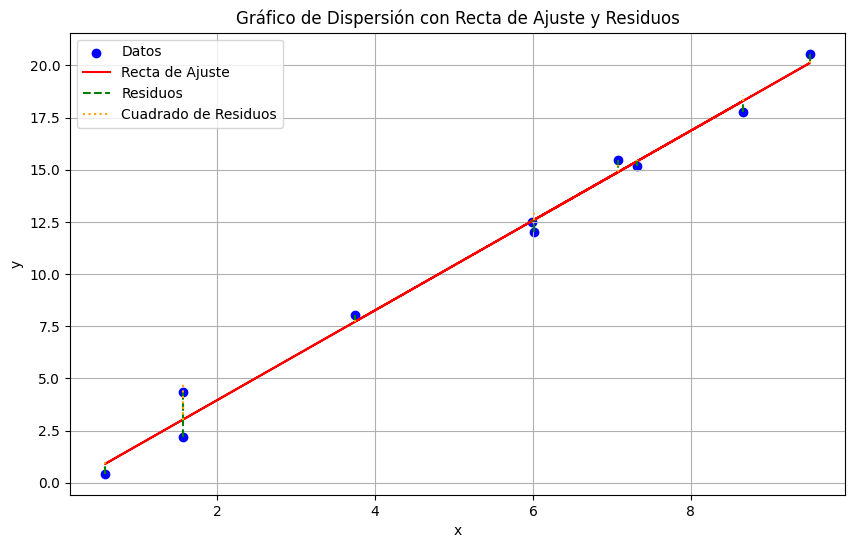

In [57]:
# Paso 2: Crear datos simulados
np.random.seed(42)  # Fijar la semilla para reproducibilidad
x = np.random.rand(10) * 10  # Valores de x
y = 2 * x + 1 + np.random.randn(10)  # Valores de y con un poco de ruido

# Paso 3: Calcular la recta de regresión (minimos cuadrados)
coefficients = np.polyfit(x, y, 1)  # Ajuste lineal
slope, intercept = coefficients

# Función de la recta
y_fit = slope * x + intercept

# Paso 4: Graficar el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, y_fit, color='red', label='Recta de Ajuste')

# Paso 6: Graficar los residuos y los cuadrados de los residuos
for i in range(len(x)):
    # Residual
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='green', linestyle='--', label='Residuos' if i == 0 else "")

    # Cuadrado del residual
    plt.plot([x[i], x[i]], [y_fit[i], y_fit[i] + (y[i] - y_fit[i])**2], color='orange', linestyle=':', label='Cuadrado de Residuos' if i == 0 else "")
    
# Configuraciones finales
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de Dispersión con Recta de Ajuste y Residuos')
plt.legend()
plt.grid(True)
plt.show()


### 2. Visualización de mínimos cuadrados
+ Ejemplo

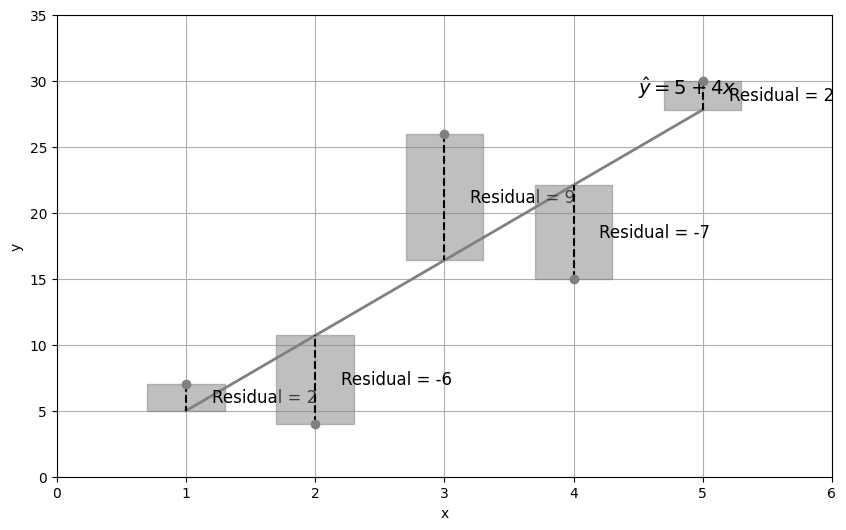

In [58]:
# Visualización de mínimos cuadrados

# Datos simulados
x = np.array([1, 2, 3, 4, 5])
y = np.array([7, 4, 26, 15, 30])

# Calcular la recta de ajuste
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Función de la recta
y_fit = slope * x + intercept

# Crear la figura y el eje
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='gray', zorder=5)

# Graficar la recta de ajuste
plt.plot(x, y_fit, color='gray', linewidth=2)

# Graficar los residuos, cuadrados y sus superficies
for i in range(len(x)):
    # Residual
    residual = y[i] - y_fit[i]
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black', linestyle='--', zorder=4)
    
    # Cuadrado del residual
    plt.fill_betweenx([y_fit[i], y_fit[i] + residual], x[i] - 0.3, x[i] + 0.3, color='gray', alpha=0.5, zorder=3)
    
    # Anotación del residual
    plt.text(x[i] + 0.2, y_fit[i] + residual / 2, f'Residual = {int(residual)}', fontsize=12, verticalalignment='center')

# Anotación de la recta de ajuste
plt.text(4.5, 29, r'$\hat{y} = 5 + 4x$', fontsize=14, color='black')

# Configuraciones finales del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 6)
plt.ylim(0, 35)
plt.grid(True)
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. Old Faithful. Problema de regresión a resolver:
+ Para los siguietnes datos, altura de la erupción e intervalo posterior a una erupción:
    + Altura 140, 110, 125, 120, 140, 120, 125, 150,
    + Intervalo posterior 92, 65, 72, 94, 83, 94, 101, 87
+ Calcule :
    + a: La correlación y regresión con sm.OLS y modelo.summary()
    + b: Calcule slope, a intercept también con np.polyfit
    + c: Con sklearn haga lo mismo
+ c: Compare slope e intercept de a b y c. Cual es la mejor opcón para armar la recta de ajuste?
+ d: Calcule el mejor tiempo predicho del intervalo posterior a una erupción (hasta la siguiente erupción) dado que la erupción actual tiene una altura de 100 pies. 
    + Haga los calculos con las tres librerias y compare los resultados de las predicciones. Cual es la mas confiable y porque?

#### 3.1 Analisis de correlación y linealidad

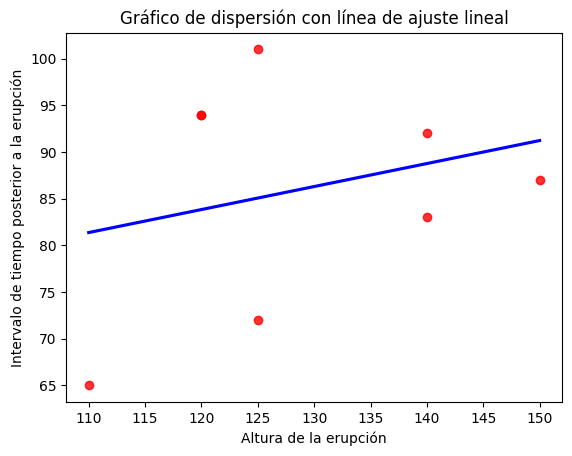

Coeficiente de correlación de Pearson: 0.27, valor p: 0.52
Coeficiente de correlación de Spearman: 0.01, valor p: 0.98


In [59]:
# Datos de ejemplo
x = [140, 110, 125, 120, 140, 120, 125, 150]  # Altura de la erupción
y = [92, 65, 72, 94, 83, 94, 101, 87]         # Intervalo de tiempo posterior a la erupción

# Gráfico de dispersión con línea de ajuste lineal
sns.regplot(x=x, y=y, color='red', line_kws={'color': 'blue'}, ci=None)

# Mostrar gráfico con etiquetas
plt.xlabel('Altura de la erupción')
plt.ylabel('Intervalo de tiempo posterior a la erupción')
plt.title('Gráfico de dispersión con línea de ajuste lineal')
plt.show()

# Cálculo del coeficiente de correlación de Pearson
r, p_value = pearsonr(x, y)
print(f"Coeficiente de correlación de Pearson: {r:.2f}, valor p: {p_value:.2g}")

# Cálculo del coeficiente de correlación de Spearman
rho, p_value = spearmanr(x, y)
print(f"Coeficiente de correlación de Spearman: {rho:.2f}, valor p: {p_value:.2g}")

#### 3.2 Analisis de correlación y linealidad

                            OLS Regression Results                            
Dep. Variable:              Intervalo   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                    0.4694
Date:                Thu, 12 Sep 2024   Prob (F-statistic):              0.519
Time:                        20:05:01   Log-Likelihood:                -30.505
No. Observations:                   8   AIC:                             65.01
Df Residuals:                       6   BIC:                             65.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2677     46.531      1.166      0.2

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dani\AppData\Local\Temp\ipykernel_24808\833411408.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(altura_linea, prediccion_linea_ols, label=f'Regresión OLS (y = {modelo_ols.params[1]:.2f}x + {modelo_ols.params[0]:.2f})', color='blue')


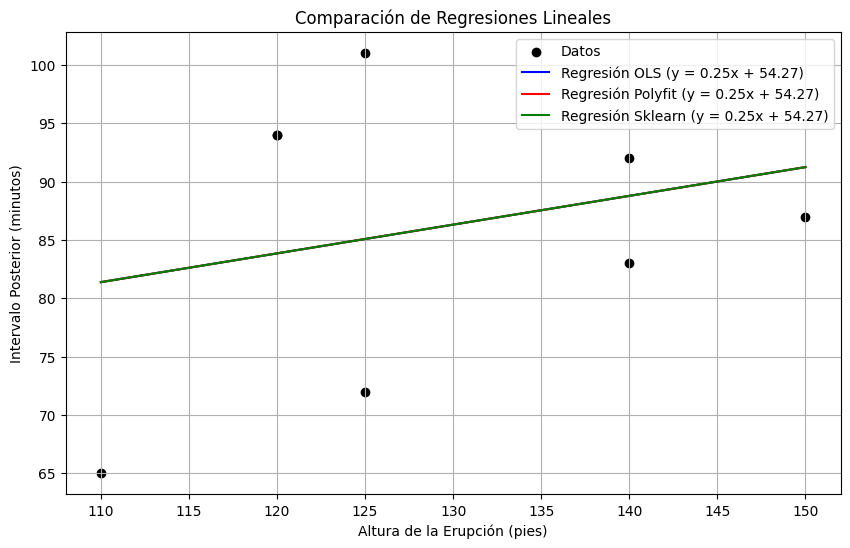

In [60]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos
altura = np.array([140, 110, 125, 120, 140, 120, 125, 150])
intervalo_posterior = np.array([92, 65, 72, 94, 83, 94, 101, 87])

# Crear un DataFrame
df = pd.DataFrame({'Altura': altura, 'Intervalo': intervalo_posterior})

# Paso 2a: Regresión con sm.OLS
X = sm.add_constant(df['Altura'])  # Agregar constante
y = df['Intervalo']
modelo_ols = sm.OLS(y, X).fit()
# Resumen del modelo
print(modelo_ols.summary())

# Paso 2b: Regresión con np.polyfit
slope_polyfit, intercept_polyfit = np.polyfit(df['Altura'], df['Intervalo'], 1)

# Paso 2c: Regresión con sklearn
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(df[['Altura']], df['Intervalo'])
slope_sklearn = modelo_sklearn.coef_[0]
intercept_sklearn = modelo_sklearn.intercept_

# Paso 3: Predicciones para altura de 100 pies
altura_prediccion = 100
prediccion_ols = modelo_ols.predict([1, altura_prediccion])
prediccion_polyfit = slope_polyfit * altura_prediccion + intercept_polyfit
prediccion_sklearn = modelo_sklearn.predict([[altura_prediccion]])

# Generar puntos para las líneas de regresión
altura_linea = np.linspace(min(altura), max(altura), 100)
prediccion_linea_ols = modelo_ols.predict(sm.add_constant(altura_linea))
prediccion_linea_polyfit = slope_polyfit * altura_linea + intercept_polyfit
prediccion_linea_sklearn = slope_sklearn * altura_linea + intercept_sklearn

# Graficar las rectas de ajuste
plt.figure(figsize=(10, 6))
plt.scatter(df['Altura'], df['Intervalo'], color='black', label='Datos')
plt.plot(altura_linea, prediccion_linea_ols, label=f'Regresión OLS (y = {modelo_ols.params[1]:.2f}x + {modelo_ols.params[0]:.2f})', color='blue')
plt.plot(altura_linea, prediccion_linea_polyfit, label=f'Regresión Polyfit (y = {slope_polyfit:.2f}x + {intercept_polyfit:.2f})', color='red')
plt.plot(altura_linea, prediccion_linea_sklearn, label=f'Regresión Sklearn (y = {slope_sklearn:.2f}x + {intercept_sklearn:.2f})', color='green')
plt.title('Comparación de Regresiones Lineales')
plt.xlabel('Altura de la Erupción (pies)')
plt.ylabel('Intervalo Posterior (minutos)')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# Crear un DataFrame para mostrar los resultados en formato de tabla
resultados = pd.DataFrame({
    'Método': ['sm.OLS', 'np.polyfit', 'sklearn'],
    'Slope (Pendiente)': [modelo_ols.params[1], slope_polyfit, slope_sklearn],
    'Intercept (Intercepto)': [modelo_ols.params[0], intercept_polyfit, intercept_sklearn],
    'Predicción (Altura 100)': [prediccion_ols[0], prediccion_polyfit, prediccion_sklearn[0]]
})
resultados

C:\Users\Dani\AppData\Local\Temp\ipykernel_24808\4100166238.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope (Pendiente)': [modelo_ols.params[1], slope_polyfit, slope_sklearn],
C:\Users\Dani\AppData\Local\Temp\ipykernel_24808\4100166238.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept (Intercepto)': [modelo_ols.params[0], intercept_polyfit, intercept_sklearn],


,Método,Slope (Pendiente),Intercept (Intercepto),Predicción (Altura 100)
0,sm.OLS,0.246465,54.267677,78.914141
1,np.polyfit,0.246465,54.267677,78.914141
2,sklearn,0.246465,54.267677,78.914141


**Comparación de coeficientes:**
+ sm.OLS: Pendiente: 0.2465, Intercepto: 54.27, R²: 0.073
+ np.polyfit: Pendiente: 0.2465, Intercepto: 54.27, 
+ sklearn:Pendiente: 0.2465, Intercepto: 54.27

**Predicciones para una altura de 100 pies:**
+ sm.OLS: 78.91 minutos, np.polyfit: 78.91 minutos, sklearn: 78.91 minutos

**Evaluación:**
+ *yˆ = 0.25x + 54.3*
+ Los resultados para la pendiente, el intercepto y la predicción son idénticos en las tres librerías. 
    + Por eso se ve un solo color correspondiente a la ultimalinea ploteada.
+ El R² de la regresión OLS es bastante bajo (0.073), lo que indica que el modelo tiene un ajuste muy limitado a los datos. 
+ Esto sugiere que la relación entre la altura de la erupción y el intervalo posterior no está bien representada por una regresión lineal simple.
+ Dado que los coeficientes y predicciones son consistentes entre los tres métodos, no hay una diferencia significativa entre las opciones en este caso. 
+ Sin embargo, el bajo valor de R^2 indica que el modelo en general no es muy confiable para predecir el intervalo posterior basado solo en la altura de la erupción. ​

-------------------------------------------------------------------------------------------------------------------------------------------------------

### 4. **Presupuestos e ingresos brutos de películas. Correlación y Regresión**
+ En la siguiente tabla se muestran los sistolicas (en millones de dólares) y los ingresos brutos (en millones de dólares) 
    + de películas seleccionadas al azar (según datos de la Motion Picture Association of America). 
    + Presupuesto	62	90	50	35	200	100	90
    + Ingresos	65	64	48	57	601	146	47				
+ ¿Parece existir una correlación lineal entre el dinero gastado para filmar la película y la cantidad recuperada en las salas de cine? 
    + Además del monto del presupuesto, identifique otro factor importante que puede afectar la cantidad de dinero que obtiene la película.

#### 4.1 Analisis de correlación

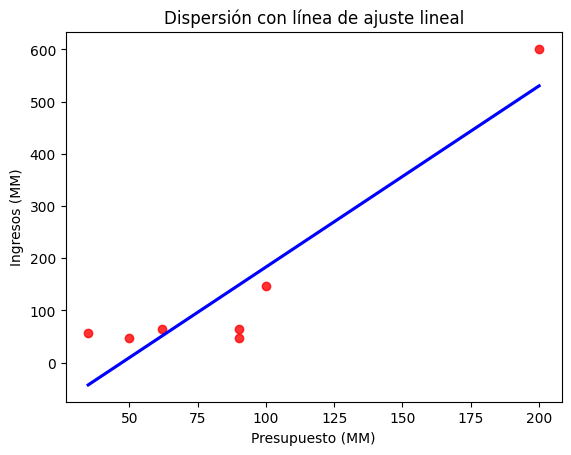

Coeficiente de correlación de Pearson: 0.93, valor p: 0.0028
Coeficiente de correlación de Spearman: 0.63, valor p: 0.13


In [62]:
# Datos de ejemplo
x = [62, 90, 50, 35, 200, 100, 90]  # Presupuesto
y = [65, 64, 48, 57, 601, 146, 47]  # Ingresos

# Gráfico de dispersión con línea de ajuste lineal
sns.regplot(x=x, y=y, color='red', line_kws={'color': 'blue'}, ci=None)

# Mostrar gráfico con etiquetas
plt.xlabel('Presupuesto (MM)')
plt.ylabel('Ingresos (MM)')
plt.title('Dispersión con línea de ajuste lineal')
plt.show()

# Cálculo del coeficiente de correlación de Pearson
r, p_value = pearsonr(x, y)
print(f"Coeficiente de correlación de Pearson: {r:.2f}, valor p: {p_value:.2g}")

# Cálculo del coeficiente de correlación de Spearman
rho, p_value = spearmanr(x, y)
print(f"Coeficiente de correlación de Spearman: {rho:.2f}, valor p: {p_value:.2g}")

+ Se observa una muy alta correlación entre ambas variables. Esta correlación está apoyada por:
    + Un alto índice de correlaicón de Pearson.
    + Un bajo valor p < 0.01 que desestima la posibilidad de la H0 que ambas variables no estén correlacionadas.
+ El coeficiente de correlación de Spearman arroja evidencia (observada) que la correlación existe (> 0.5 pero no es monótona)

**Conclusión**: 
+ Existe correlación entre el presupuesto y los ingresos que la película genera.
+ Existen también otros factores que inciden en los ingresos que genra la pelicula:
    + Las criticas del avant premiere
    + La calidad de los actores
    + El género y la trama

#### 4.2 **Ecuación de la recta de regresión**
+ Calcule la mejor cantidad predicha de los ingresos brutos de una película con un presupuesto de $40 millones. 

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dani\AppData\Local\Temp\ipykernel_24808\1115464193.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(altura_linea, prediccion_linea_ols, label=f'Regresión OLS (y = {modelo_ols.params[1]:.2f}x {modelo_ols.params[0]:.2f})', color='blue')


                            OLS Regression Results                            
Dep. Variable:               Ingresos   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     30.01
Date:                Thu, 12 Sep 2024   Prob (F-statistic):            0.00276
Time:                        20:05:02   Log-Likelihood:                -39.779
No. Observations:                   7   AIC:                             83.56
Df Residuals:                       5   BIC:                             83.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -164.1429     65.061     -2.523      

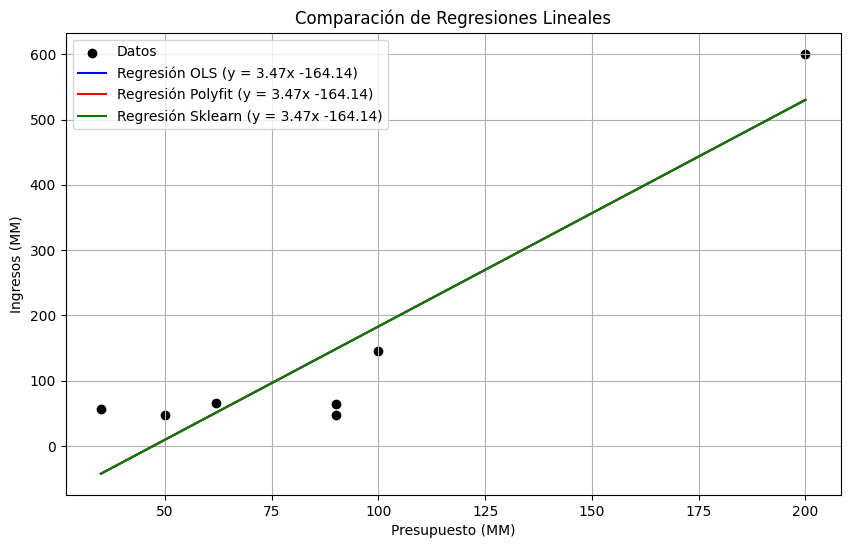

In [63]:
# Datos
presupuesto = np.array(x)
ingresos = np.array(y)

# Crear un DataFrame
df = pd.DataFrame({'Presupuesto': presupuesto, 'Ingresos': ingresos})

# Paso 2a: Regresión con sm.OLS
X = sm.add_constant(df['Presupuesto'])  # Agregar constante
y = df['Ingresos']
modelo_ols = sm.OLS(y, X).fit()
# Resumen del modelo
print(modelo_ols.summary())

# Paso 2b: Regresión con np.polyfit
slope_polyfit, intercept_polyfit = np.polyfit(df['Presupuesto'], df['Ingresos'], 1)

# Paso 2c: Regresión con sklearn
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(df[['Presupuesto']], df['Ingresos'])
slope_sklearn = modelo_sklearn.coef_[0]
intercept_sklearn = modelo_sklearn.intercept_

# Paso 3: Predicciones para altura de 100 pies
sistolica_prediccion = 40     # 40 millotes
prediccion_ols = modelo_ols.predict([1, sistolica_prediccion])
prediccion_polyfit = slope_polyfit * sistolica_prediccion + intercept_polyfit
prediccion_sklearn = modelo_sklearn.predict([[sistolica_prediccion]])

# Generar puntos para las líneas de regresión
altura_linea = np.linspace(min(presupuesto), max(presupuesto), 100)
prediccion_linea_ols = modelo_ols.predict(sm.add_constant(altura_linea))
prediccion_linea_polyfit = slope_polyfit * altura_linea + intercept_polyfit
prediccion_linea_sklearn = slope_sklearn * altura_linea + intercept_sklearn

# Graficar las rectas de ajuste
plt.figure(figsize=(10, 6))
plt.scatter(df['Presupuesto'], df['Ingresos'], color='black', label='Datos')
plt.plot(altura_linea, prediccion_linea_ols, label=f'Regresión OLS (y = {modelo_ols.params[1]:.2f}x {modelo_ols.params[0]:.2f})', color='blue')
plt.plot(altura_linea, prediccion_linea_polyfit, label=f'Regresión Polyfit (y = {slope_polyfit:.2f}x {intercept_polyfit:.2f})', color='red')
plt.plot(altura_linea, prediccion_linea_sklearn, label=f'Regresión Sklearn (y = {slope_sklearn:.2f}x {intercept_sklearn:.2f})', color='green')
plt.title('Comparación de Regresiones Lineales')
plt.xlabel('Presupuesto (MM)')
plt.ylabel('Ingresos (MM)')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Crear un DataFrame para mostrar los resultados en formato de tabla
resultados = pd.DataFrame({
    'Método': ['sm.OLS', 'np.polyfit', 'sklearn'],
    'Slope (Pendiente)': [modelo_ols.params[1], slope_polyfit, slope_sklearn],
    'Intercept (Intercepto)': [modelo_ols.params[0], intercept_polyfit, intercept_sklearn],
    'Predicción (Presupuesto (40MM))': [prediccion_ols[0], prediccion_polyfit, prediccion_sklearn[0]]
})

# Mostrar la tabla de resultados
resultados

C:\Users\Dani\AppData\Local\Temp\ipykernel_24808\1702667482.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope (Pendiente)': [modelo_ols.params[1], slope_polyfit, slope_sklearn],
C:\Users\Dani\AppData\Local\Temp\ipykernel_24808\1702667482.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept (Intercepto)': [modelo_ols.params[0], intercept_polyfit, intercept_sklearn],


,Método,Slope (Pendiente),Intercept (Intercepto),Predicción (Presupuesto (40MM))
0,sm.OLS,3.47209,-164.142932,-25.259326
1,np.polyfit,3.47209,-164.142932,-25.259326
2,sklearn,3.47209,-164.142932,-25.259326


**Comparación de coeficientes:**
+ sm.OLS:     Pendiente: 3.47, Intercepto: -164.14, R²: 0.85
+ np.polyfit: Pendiente: 3.47, Intercepto: -164.14, 
+ sklearn:    Pendiente: 3.47, Intercepto: -164.14

**Predicciones para una altura de 100 pies:**
+ sm.OLS: 78.91 minutos, np.polyfit: 78.91 minutos, sklearn: 78.91 minutos

**Evaluación:**
+ *yˆ = 3.47x - 164.14*
+ Los resultados para la pendiente, el intercepto y la predicción son idénticos en las tres librerías. 
    + Por eso se ve un solo color correspondiente a la ultimalinea ploteada.
    + La predicción da un resultado negativo **(-25MM)**
+ El R² de la regresión OLS es alto (0.85), lo que indica que el modelo tiene un ajuste bastante bueno.
+ Esto sugiere que la relación entre el presupuesto y los ingresos reales, está bien representada por una regresión lineal simple.
+ Dado que los coeficientes y predicciones son consistentes entre los tres métodos, no hay una diferencia significativa entre las opciones en este caso. 

-----------------------------------------------------------------------------------------------------------------------------------------------------

### 5. Mediciones de presión sanguínea. 
+ Calcule la mejor presión sanguínea diastólica predicha para una persona con una lectura sistólica de 140.
    + Sistólica 138 130 135 140 120 125 120 130 130 144 143 140 130 150
    + Diastólica 82 91 100 100 80 90 80 80 80 98 105 85 70 100

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dani\AppData\Local\Temp\ipykernel_24808\4088585595.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(altura_linea, prediccion_linea_ols, label=f'Regresión OLS (y = {modelo_ols.params[1]:.2f}x {modelo_ols.params[0]:.2f})', color='blue')


                            OLS Regression Results                            
Dep. Variable:             Diastolica   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     9.157
Date:                Thu, 12 Sep 2024   Prob (F-statistic):             0.0105
Time:                        20:05:02   Log-Likelihood:                -48.393
No. Observations:                  14   AIC:                             100.8
Df Residuals:                      12   BIC:                             102.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3798     34.118     -0.421      0.6

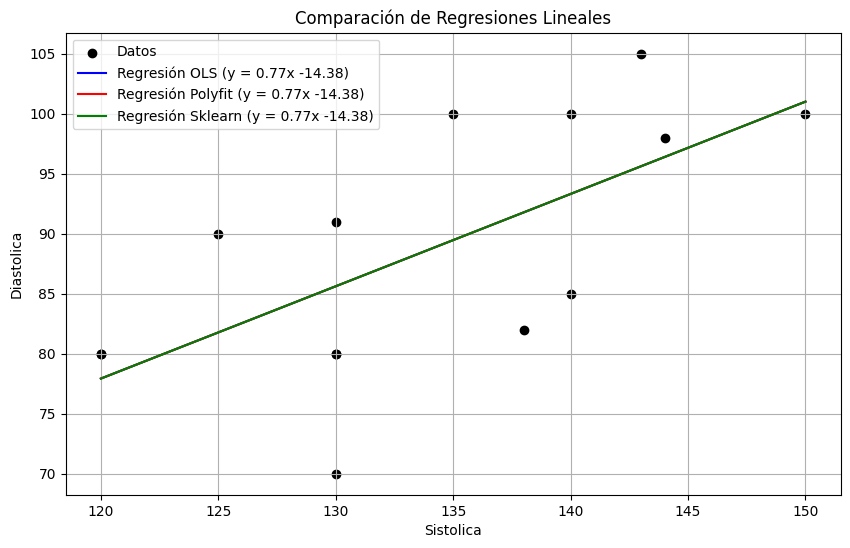

In [65]:
# Datos
sistolica = np.array([138, 130, 135, 140, 120, 125, 120, 130, 130, 144, 143, 140, 130, 150])
diastolica = np.array([82, 91, 100, 100, 80, 90, 80, 80, 80, 98, 105, 85, 70, 100])

# Crear un DataFrame
df = pd.DataFrame({'Sistolica': sistolica, 'Diastolica': diastolica})

# Paso 2a: Regresión con sm.OLS
X = sm.add_constant(df['Sistolica'])  # Agregar constante
y = df['Diastolica']
modelo_ols = sm.OLS(y, X).fit()
# Resumen del modelo
print(modelo_ols.summary())

# Paso 2b: Regresión con np.polyfit
slope_polyfit, intercept_polyfit = np.polyfit(df['Sistolica'], df['Diastolica'], 1)

# Paso 2c: Regresión con sklearn
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(df[['Sistolica']], df['Diastolica'])
slope_sklearn = modelo_sklearn.coef_[0]
intercept_sklearn = modelo_sklearn.intercept_

# Paso 3: Predicciones para altura de 100 pies
sistolica_prediccion = 140     # 140 sistolica
prediccion_ols = modelo_ols.predict([1, sistolica_prediccion])
prediccion_polyfit = slope_polyfit * sistolica_prediccion + intercept_polyfit
prediccion_sklearn = modelo_sklearn.predict([[sistolica_prediccion]])

# Generar puntos para las líneas de regresión
altura_linea = np.linspace(min(sistolica), max(sistolica), 100)
prediccion_linea_ols = modelo_ols.predict(sm.add_constant(altura_linea))
prediccion_linea_polyfit = slope_polyfit * altura_linea + intercept_polyfit
prediccion_linea_sklearn = slope_sklearn * altura_linea + intercept_sklearn

# Graficar las rectas de ajuste
plt.figure(figsize=(10, 6))
plt.scatter(df['Sistolica'], df['Diastolica'], color='black', label='Datos')
plt.plot(altura_linea, prediccion_linea_ols, label=f'Regresión OLS (y = {modelo_ols.params[1]:.2f}x {modelo_ols.params[0]:.2f})', color='blue')
plt.plot(altura_linea, prediccion_linea_polyfit, label=f'Regresión Polyfit (y = {slope_polyfit:.2f}x {intercept_polyfit:.2f})', color='red')
plt.plot(altura_linea, prediccion_linea_sklearn, label=f'Regresión Sklearn (y = {slope_sklearn:.2f}x {intercept_sklearn:.2f})', color='green')
plt.title('Comparación de Regresiones Lineales')
plt.xlabel('Sistolica')
plt.ylabel('Diastolica')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# Crear un DataFrame para mostrar los resultados en formato de tabla
resultados = pd.DataFrame({
    'Método': ['sm.OLS', 'np.polyfit', 'sklearn'],
    'Slope (Pendiente)': [modelo_ols.params[1], slope_polyfit, slope_sklearn],
    'Intercept (Intercepto)': [modelo_ols.params[0], intercept_polyfit, intercept_sklearn],
    'Predicción (Diastólica (140 sistólica))': [prediccion_ols[0], prediccion_polyfit, prediccion_sklearn[0]]
})

# Mostrar la tabla de resultados
resultados

C:\Users\Dani\AppData\Local\Temp\ipykernel_24808\2125786535.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope (Pendiente)': [modelo_ols.params[1], slope_polyfit, slope_sklearn],
C:\Users\Dani\AppData\Local\Temp\ipykernel_24808\2125786535.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept (Intercepto)': [modelo_ols.params[0], intercept_polyfit, intercept_sklearn],


,Método,Slope (Pendiente),Intercept (Intercepto),Predicción (Diastólica (140 sistólica))
0,sm.OLS,0.769236,-14.379813,93.313218
1,np.polyfit,0.769236,-14.379813,93.313218
2,sklearn,0.769236,-14.379813,93.313218


**Comparación de coeficientes:**
+ sm.OLS:     Pendiente: 0.77, Intercepto: -14.38, R²: 0.433
+ np.polyfit: Pendiente: 0.77, Intercepto: -14.38, 
+ sklearn:    Pendiente: 0.77, Intercepto: -14.38

**Predicciones para una sistolica de 140**
+ sm.OLS: 93.3 diastolica, np.polyfit: 93.3 diastolica, sklearn: 93.3 diastolica

**Evaluación:**
+ *yˆ = 0.77x - 14.38*
+ Los resultados para la pendiente, el intercepto y la predicción son idénticos en las tres librerías. 
    + Por eso se ve un solo color correspondiente a la ultimalinea ploteada.
    + La predicción da un resultado negativo **( 93.3 diastolica)**
+ El R² de la regresión OLS es alto (0.433), lo que indica que el modelo tiene un ajuste bastante bueno.
+ Esto sugiere que la relación entre el presupuesto y los ingresos reales, está bastante bien representada por una regresión lineal simple.
+ Dado que los coeficientes y predicciones son consistentes entre los tres métodos, no hay una diferencia significativa entre las opciones en este caso. 

-----------------------------------------------------------------------------------------------------------------------------------------------

*Daniel Christello*